In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as ss

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor,kernels
from sklearn.model_selection import train_test_split, KFold,LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from src.models.constants import Constants
from src.models import util
from src.models.gaussian_process import featurize

In [5]:
#plt.style.available

In [7]:
plt.style.use('seaborn-talk')
cmap = plt.get_cmap("tab10")
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
processed_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/processed"
n_map = {1:"Base",2:"Thru Rnd 1",3:"Thru Rnd 2",4:"Thru Rnd 3",5:"Thru Rnd 4",6:"Thru Rnd 5",7:"Thru Rnd 6-GP"}
seed=0
fname = f'3-averaged_Round5-Standardized.csv' #Data through Round 6 w. GP
f = processed_dir+"/"+fname
df = pd.read_csv(f,index_col=0)
X,y=util.get_Xy(df)
print(f'Num Samples: {X.shape[0]}, Num Features: {X.shape[1]}')
print(f'Range of y: {max(y)-min(y):.3} Mean of y: {y.mean():.3} SD of y: {y.std():.3}')
X.head()



Num Samples: 50, Num Features: 7
Range of y: 4.26 Mean of y: 3.14 SD of y: 1.23


,Sn,Ga,Fe,Cu,Ca,diversity,loading
0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1
2,0,0,0,0,4,1,4
3,0,0,0,0,8,1,8
4,0,0,0,1,0,1,1


In [10]:
X,y=util.get_Xy(df)
n = X.shape[0]
X = X.to_numpy()
y = y.to_numpy()
y_preds = []
y_actuals = []
loo = KFold(n_splits=n)
for train_index,test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pipeline = make_pipeline(GaussianProcessRegressor(kernel=1*kernels.RBF(length_scale=1.0,length_scale_bounds=(1e-2,1e2)),n_restarts_optimizer=5,random_state=seed))
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    y_preds.append(y_pred[0])
    y_actuals.append(y_test[0])

In [12]:
y_preds = np.asarray(y_preds)
y_actuals = np.asarray(y_actuals)

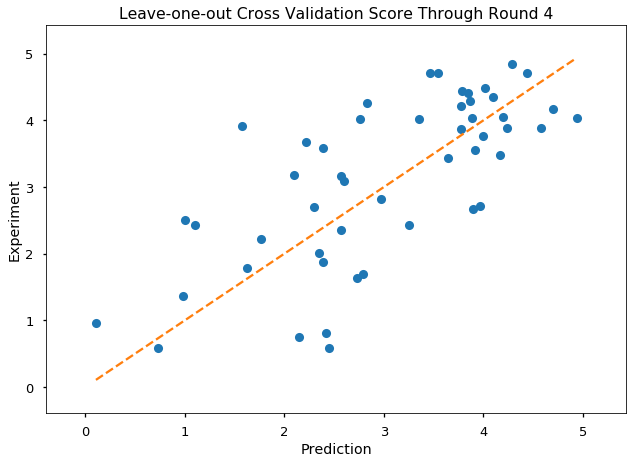

In [13]:
plt.plot(y_preds, y_actuals, 'o')
# plt.plot(y_preds,y_actuals,'o')
plt.plot([min(y_preds),max(y_preds)],[min(y_preds),max(y_preds)],'--')
plt.xlabel("Prediction")
plt.ylabel("Experiment")
plt.xlim((min(y_preds)-.5,max(y_preds)+.5))
plt.ylim((min(y_preds)-.5,max(y_preds)+.5))
plt.title("Leave-one-out Cross Validation Score Through Round 4")
plt.show()

In [24]:
resids = y_preds - y_actuals
abs_resids = np.abs(resids)
percent_resids = resids / y_actuals
abs_percent_resids = 100*abs_resids / y_actuals

for name,resid_list in zip(["Abs Residual","Abs % Residual"],[abs_resids,abs_percent_resids]):
    print('\n\n\n')
    print(Constants().METALS)
    sort_indices = np.argsort(resid_list)
    for i in range(4):
        idx = sort_indices[i]
        print(f'Sn: {X[idx,0]} Ga: {X[idx,1]} Fe: {X[idx,2]} Cu: {X[idx,3]} Ca: {X[idx,4]} Pred: {y_preds[idx]:.3} Act: {y_actuals[idx]:.3} {name}: {resid_list[idx]:.3}')
    
    print('\n')
    for i in range(4):
        idx = sort_indices[-(i+1)]
        print(f'Sn: {X[idx,0]} Ga: {X[idx,1]} Fe: {X[idx,2]} Cu: {X[idx,3]} Ca: {X[idx,4]} Pred: {y_preds[idx]:.3} Act: {y_actuals[idx]:.3} {name}: {resid_list[idx]:.3}')
    





['Sn', 'Ga', 'Fe', 'Cu', 'Ca']
Sn: 4 Ga: 0 Fe: 1 Cu: 1 Ca: 1 Pred: 3.77 Act: 3.86 Abs Residual: 0.0927
Sn: 4 Ga: 0 Fe: 0 Cu: 4 Ca: 1 Pred: 4.2 Act: 4.06 Abs Residual: 0.143
Sn: 0 Ga: 0 Fe: 8 Cu: 0 Ca: 0 Pred: 0.734 Act: 0.588 Abs Residual: 0.146
Sn: 8 Ga: 0 Fe: 1 Cu: 0 Ca: 1 Pred: 2.97 Act: 2.82 Abs Residual: 0.149


Sn: 0 Ga: 0 Fe: 0 Cu: 8 Ca: 0 Pred: 1.57 Act: 3.92 Abs Residual: 2.35
Sn: 0 Ga: 0 Fe: 0 Cu: 0 Ca: 1 Pred: 2.45 Act: 0.578 Abs Residual: 1.87
Sn: 0 Ga: 4 Fe: 0 Cu: 4 Ca: 0 Pred: 2.41 Act: 0.805 Abs Residual: 1.61
Sn: 0 Ga: 0 Fe: 4 Cu: 0 Ca: 0 Pred: 0.997 Act: 2.5 Abs Residual: 1.5




['Sn', 'Ga', 'Fe', 'Cu', 'Ca']
Sn: 4 Ga: 0 Fe: 1 Cu: 1 Ca: 1 Pred: 3.77 Act: 3.86 Abs % Residual: 2.4
Sn: 4 Ga: 0 Fe: 0 Cu: 4 Ca: 1 Pred: 4.2 Act: 4.06 Abs % Residual: 3.53
Sn: 0 Ga: 0 Fe: 1 Cu: 8 Ca: 4 Pred: 3.88 Act: 4.04 Abs % Residual: 3.78
Sn: 8 Ga: 0 Fe: 1 Cu: 0 Ca: 1 Pred: 2.97 Act: 2.82 Abs % Residual: 5.29


Sn: 0 Ga: 0 Fe: 0 Cu: 0 Ca: 1 Pred: 2.45 Act: 0.578 Abs % Residual: 3.24e